In [4]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.grid_search import GridSearchCV

C:\Users\krishna\Anaconda3\envs\env_full\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\krishna\Anaconda3\envs\env_full\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
cols=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]

In [6]:
len(cols)

13

In [7]:
datac=pd.read_csv("data.csv")

In [8]:
target=pd.read_csv("target.csv")

In [9]:
datac.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,0.001,1.737192,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500
1,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,0.001,1.777445,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000
2,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,0.001,1.685355,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000
3,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,0.001,1.687490,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000
4,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,0.001,1.737626,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364


In [10]:
target.head()

,shares,sharesB,sharesLog
0,593,0,6.385194
1,711,0,6.566672
2,1500,1,7.313220
3,1200,0,7.090077
4,505,0,6.224558


In [67]:
check=PCA(n_components='mle',svd_solver='full')
check.fit(datac.drop(cols,axis=1))

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [71]:
dataAfterSVD=pd.DataFrame(np.dot(datac.drop(cols,axis=1),dataSVD))
dataAfterPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-5.686480,-9.318260,2.859732,0.046361,4.610109,-0.831687,-1.758245,-1.115568,0.275839,0.298734,...,-0.008724,-0.016862,-0.010675,0.003238,0.042287,-0.112825,0.362762,0.053087,0.001784,0.015227
1,-0.190354,-0.536630,0.216537,-0.110050,5.618105,-1.156996,-1.671289,-0.699136,0.102430,0.614461,...,0.001681,-0.049293,-0.053622,-0.000803,-0.018211,-0.109805,0.340192,0.042129,-0.001497,0.028914
2,-6.205912,-10.159002,3.107096,0.062724,4.401179,-0.767702,-1.832432,-1.358718,0.263126,0.485981,...,-0.081554,-0.070033,-0.050404,0.060628,-0.056930,-0.055497,0.365798,0.040237,-0.006935,0.001937
3,-0.190527,-0.576291,0.221597,-0.141398,6.529074,-1.397465,-1.933142,-0.933397,0.412656,0.193836,...,0.053807,0.016892,0.014535,0.029152,-0.013508,-0.085820,0.373108,0.022811,0.008162,0.016969
4,-7.541962,-12.285155,3.777634,-0.060691,7.390618,-1.288160,0.345524,0.642983,-0.215664,0.465190,...,-0.014135,0.005743,-0.060418,0.023126,-0.024036,-0.073626,0.334649,0.051912,0.018403,0.018966


In [70]:
dataPCA=pd.DataFrame(check.components_.T,columns=["%d"%(i) for i in range(len(check.components_))])
dataPCA.shape

(45, 44)

In [71]:
dataAfterPCA=pd.DataFrame(np.dot(datac.drop(cols,axis=1),dataPCA))
dataAfterPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-5.686480,-9.318260,2.859732,0.046361,4.610109,-0.831687,-1.758245,-1.115568,0.275839,0.298734,...,-0.008724,-0.016862,-0.010675,0.003238,0.042287,-0.112825,0.362762,0.053087,0.001784,0.015227
1,-0.190354,-0.536630,0.216537,-0.110050,5.618105,-1.156996,-1.671289,-0.699136,0.102430,0.614461,...,0.001681,-0.049293,-0.053622,-0.000803,-0.018211,-0.109805,0.340192,0.042129,-0.001497,0.028914
2,-6.205912,-10.159002,3.107096,0.062724,4.401179,-0.767702,-1.832432,-1.358718,0.263126,0.485981,...,-0.081554,-0.070033,-0.050404,0.060628,-0.056930,-0.055497,0.365798,0.040237,-0.006935,0.001937
3,-0.190527,-0.576291,0.221597,-0.141398,6.529074,-1.397465,-1.933142,-0.933397,0.412656,0.193836,...,0.053807,0.016892,0.014535,0.029152,-0.013508,-0.085820,0.373108,0.022811,0.008162,0.016969
4,-7.541962,-12.285155,3.777634,-0.060691,7.390618,-1.288160,0.345524,0.642983,-0.215664,0.465190,...,-0.014135,0.005743,-0.060418,0.023126,-0.024036,-0.073626,0.334649,0.051912,0.018403,0.018966


In [73]:
dataAfterPCA=pd.concat([dataAfterPCA,datac[cols]],axis=1)
dataAfterPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,-5.686480,-9.318260,2.859732,0.046361,4.610109,-0.831687,-1.758245,-1.115568,0.275839,0.298734,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.190354,-0.536630,0.216537,-0.110050,5.618105,-1.156996,-1.671289,-0.699136,0.102430,0.614461,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-6.205912,-10.159002,3.107096,0.062724,4.401179,-0.767702,-1.832432,-1.358718,0.263126,0.485981,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.190527,-0.576291,0.221597,-0.141398,6.529074,-1.397465,-1.933142,-0.933397,0.412656,0.193836,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.541962,-12.285155,3.777634,-0.060691,7.390618,-1.288160,0.345524,0.642983,-0.215664,0.465190,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
dataAfterPCA.shape

(39644, 57)

In [78]:
checktruncatedSVD=TruncatedSVD(n_components=20)
checktruncatedSVD.fit(datac.drop(cols,axis=1))

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
       random_state=None, tol=0.0)

In [79]:
dataSVD=pd.DataFrame(checktruncatedSVD.components_.T,columns=["%d"%(i) for i in range(len(checktruncatedSVD.components_))])
dataSVD.shape

(45, 20)

In [80]:
dataAfterSVD=pd.DataFrame(np.dot(datac.drop(cols,axis=1),dataSVD))
dataAfterSVD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.466530,-3.211009,-7.943147,3.895224,0.542789,4.548158,-1.730448,-1.065840,0.275832,0.347240,0.267277,0.592122,0.081599,0.655210,0.864078,-0.263198,0.747527,-0.725974,1.441709,1.840679
1,1.850226,-0.664150,0.515449,0.016866,0.847365,5.531356,-1.624389,-0.639681,0.102535,0.660528,-0.022816,0.637355,0.101212,0.848845,0.283162,-0.494308,1.001028,-0.353569,1.420783,1.547350
2,6.876396,-3.452095,-8.766760,4.264833,0.497332,4.343456,-1.810392,-1.310114,0.263228,0.535845,0.028667,0.734967,0.090048,0.354436,0.322574,-0.407062,0.918312,-0.876247,0.986749,1.970456
3,2.086823,-0.749849,0.623565,-0.011880,0.965353,6.427127,-1.871000,-0.851111,0.417680,0.229733,0.070695,0.651693,0.135798,0.080534,0.244390,-0.431212,0.847407,-1.035047,1.438722,1.748990
4,8.486463,-4.191425,-10.520080,5.153200,0.594077,7.306116,0.421197,0.686956,-0.218556,0.514653,-0.075804,0.589713,-0.074860,1.201807,0.776899,-0.232926,1.103443,-0.836380,1.390811,1.631403


In [81]:
dataAfterSVD=pd.concat([dataAfterSVD,datac[cols]],axis=1)
dataAfterSVD.head()

,0,1,2,3,4,5,6,7,8,9,...,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,6.466530,-3.211009,-7.943147,3.895224,0.542789,4.548158,-1.730448,-1.065840,0.275832,0.347240,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.850226,-0.664150,0.515449,0.016866,0.847365,5.531356,-1.624389,-0.639681,0.102535,0.660528,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.876396,-3.452095,-8.766760,4.264833,0.497332,4.343456,-1.810392,-1.310114,0.263228,0.535845,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.086823,-0.749849,0.623565,-0.011880,0.965353,6.427127,-1.871000,-0.851111,0.417680,0.229733,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.486463,-4.191425,-10.520080,5.153200,0.594077,7.306116,0.421197,0.686956,-0.218556,0.514653,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
dataAfterSVD.shape

(39644, 33)

In [102]:
predictors=[x for x in datac.columns]
paramTest1={'n_estimators':list(range(20,81,10))}
gsearch1=GridSearchCV(
        estimator=GradientBoostingClassifier(
                    learning_rate=0.05,
                    min_samples_split=400,
                    min_samples_leaf=50,
                    max_depth=8,
                    max_features='sqrt',
                    subsample=0.8,
                    random_state=10),
        param_grid=paramTest1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(datac,target.sharesB)


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=400,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [103]:
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

([mean: 0.70554, std: 0.03846, params: {'n_estimators': 20},
  mean: 0.70798, std: 0.03923, params: {'n_estimators': 30},
  mean: 0.70923, std: 0.03884, params: {'n_estimators': 40},
  mean: 0.70928, std: 0.04010, params: {'n_estimators': 50},
  mean: 0.71016, std: 0.03969, params: {'n_estimators': 60},
  mean: 0.70979, std: 0.04036, params: {'n_estimators': 70},
  mean: 0.70943, std: 0.04181, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.7101632041769274)

In [106]:
paramTest2={'max_depth':list(range(5,16,2)),
            'min_samples_split':list(range(200,1001,200))}
gsearch2=GridSearchCV(estimator=
                     GradientBoostingClassifier(learning_rate=0.05,
                                               n_estimators=60,
                                               max_features='sqrt',
                                                min_samples_leaf=50,
                                               subsample=0.8,
                                               random_state=10),
                     param_grid=paramTest2,scoring='roc_auc',
                     n_jobs=4,iid=False,cv=5)
gsearch2.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [5, 7, 9, 11, 13, 15], 'min_samples_split': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [107]:
gsearch2.grid_scores_,gsearch2.best_params_,gsearch2.best_score_

([mean: 0.70787, std: 0.03987, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.70914, std: 0.03953, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.70754, std: 0.04069, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.70805, std: 0.03910, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.70920, std: 0.03607, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.70905, std: 0.04013, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.70929, std: 0.04087, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.70784, std: 0.04135, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.70903, std: 0.03953, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.70848, std: 0.03659, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.70888, std: 0.04148, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.71153, std: 0.03999, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [108]:
paramTest3={'min_samples_split':list(range(1000,2100,200)),
            'min_samples_leaf':list(range(30,71,10))}
gsearch3=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                          n_estimators=60,
                                                          max_depth=9,
                                                          max_features='sqrt',
                                                          subsample=0.8,
                                                          random_state=10),
                     param_grid=paramTest3,scoring='roc_auc',n_jobs=4,
                     iid=False,cv=5)
gsearch3.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [109]:
gsearch3.grid_scores_,gsearch3.best_params_,gsearch3.best_score_

([mean: 0.70743, std: 0.04058, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.70851, std: 0.04055, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.71018, std: 0.03876, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.71121, std: 0.03763, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.70946, std: 0.03866, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.71008, std: 0.03682, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.70921, std: 0.03920, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.70985, std: 0.03792, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.71019, std: 0.03868, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.70938, std: 0.03841, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.70840, std: 0.04106, params: {'min_samples_leaf': 40, 'min_samples_spl

In [110]:
gsearch3.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

CV Score : Mean - 0.7120711 | Std - 0.0362127 | Min - 0.6440833 | Max - 0.7443357


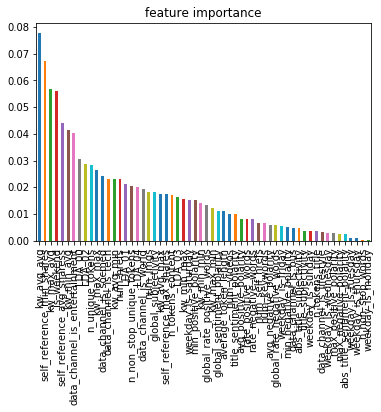

In [120]:
get_accuracy_clf(gsearch3.best_estimator_,datac,target.sharesB)

In [125]:
paramTest4={'max_features':list(range(1,20,2))}
gsearch4=GridSearchCV(
    estimator=GradientBoostingClassifier(learning_rate=0.05,
                                         n_estimators=60,
                                         max_depth=9,
                                         min_samples_split=1000,
                                         min_samples_leaf=60,
                                        subsample=0.8,
                                        random_state=10),
    param_grid=paramTest4,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch4.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [126]:
gsearch4.grid_scores_,gsearch4.best_params_,gsearch4.best_score_

([mean: 0.70990, std: 0.03086, params: {'max_features': 1},
  mean: 0.71386, std: 0.02963, params: {'max_features': 3},
  mean: 0.71279, std: 0.03717, params: {'max_features': 5},
  mean: 0.71207, std: 0.03621, params: {'max_features': 7},
  mean: 0.70844, std: 0.04141, params: {'max_features': 9},
  mean: 0.70807, std: 0.04221, params: {'max_features': 11},
  mean: 0.70685, std: 0.04450, params: {'max_features': 13},
  mean: 0.70613, std: 0.04335, params: {'max_features': 15},
  mean: 0.70705, std: 0.04499, params: {'max_features': 17},
  mean: 0.70589, std: 0.04672, params: {'max_features': 19}],
 {'max_features': 3},
 0.7138589510508598)

In [128]:
paramTest5={'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5=GridSearchCV(estimator= 
                      GradientBoostingClassifier(learning_rate=0.05,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10),
                     param_grid=paramTest5,scoring='roc_auc',n_jobs=4,
                     iid=False,cv=5)
gsearch5.fit(datac,target.sharesB)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=9,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [129]:
gsearch5.grid_scores_,gsearch5.best_params_,gsearch5.best_score_

([mean: 0.71383, std: 0.03013, params: {'subsample': 0.6},
  mean: 0.71390, std: 0.03030, params: {'subsample': 0.7},
  mean: 0.71416, std: 0.03047, params: {'subsample': 0.75},
  mean: 0.71386, std: 0.02963, params: {'subsample': 0.8},
  mean: 0.71508, std: 0.02819, params: {'subsample': 0.85},
  mean: 0.71511, std: 0.02874, params: {'subsample': 0.9}],
 {'subsample': 0.9},
 0.7151118094948385)

CV Score : Mean - 0.7151118 | Std - 0.02873665 | Min - 0.6653418 | Max - 0.743185


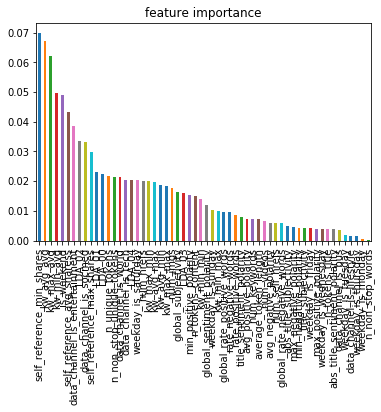

In [132]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.05,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10,
                                      subsample=0.9)
get_accuracy_clf(gbm_tuned_1,datac,target.sharesB)

CV Score : Mean - 0.7078251 | Std - 0.03224191 | Min - 0.6494208 | Max - 0.7401695


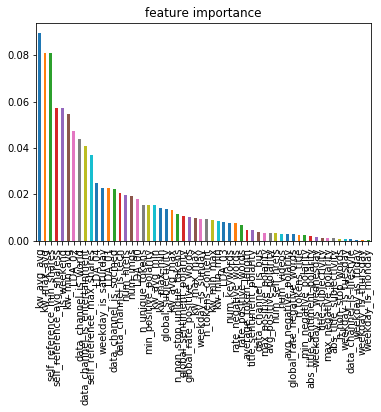

In [133]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.005,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10,
                                      subsample=0.9)
get_accuracy_clf(gbm_tuned_1,datac,target.sharesB)

CV Score : Mean - 0.7064491 | Std - 0.03321407 | Min - 0.6463646 | Max - 0.7408587


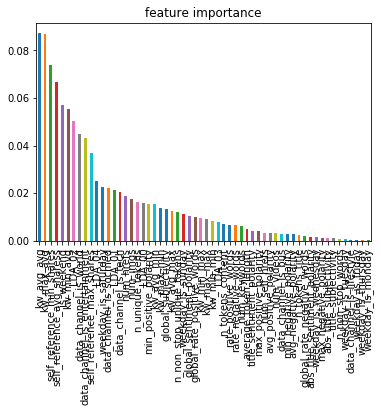

In [134]:
gbm_tuned_1=GradientBoostingClassifier(learning_rate=0.001,
                                                max_depth=9,
                                                max_features=3,
                                                n_estimators=60,
                                                min_samples_split=1000,
                                                min_samples_leaf=60,
                                                random_state=10,
                                      subsample=0.9)
get_accuracy_clf(gbm_tuned_1,datac,target.sharesB)

## Classification

In [2]:
def get_accuracy_clf(clf,X,y,kf=None,dokf=False):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i=0
    if dokf:
        for train_index,test_index in kf.split(X):
            print("iteration : ",i+1)
            xTrain,xTest=X.loc[train_index,:],X.loc[test_index,:]
            yTrain,yTest=y.loc[train_index],y.loc[test_index]
    #         print(xTest[xTest.isin([np.nan,-np.inf,np.inf]).any(1)])
    #         print(xTrain[0])
    #         print(yTrain[yTrain.isin([np.nan,-np.inf,np.inf])])
    #         df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
            clf.fit(xTrain,yTrain)
            prediction=clf.predict(xTest)
    #         print("prediction",prediction)
    #         print(yTest)
            fpr,tpr,thresholds=roc_curve(yTest,prediction)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            i=i+1
            featImp=pd.Series(clf.feature_importances_,[x for x in xTrain.columns]).sort_values(ascending=False)
            featImp.plot(kind="bar",title="feature importance")
    clf.fit(X,y)
    cv_score=cross_val_score(clf,X,y,cv=5,scoring='roc_auc')
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" 
           % (np.mean(cv_score),
              np.std(cv_score),
              np.min(cv_score),
              np.max(cv_score)))
    featImp=pd.Series(clf.feature_importances_,[x for x in X.columns]).sort_values(ascending=False)
    featImp.plot(kind="bar",title="feature importance")
    if dokf:
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        return mean_auc,mean_tpr,mean_fpr
    return
    

        

## Gradient Boost Machine

iteration :  1
iteration :  2
iteration :  3
iteration :  4
iteration :  5
CV Score : Mean - 0.6950432 | Std - 0.05569304 | Min - 0.5904393 | Max - 0.7442719
The ROC area under curve is :  0.656782336375


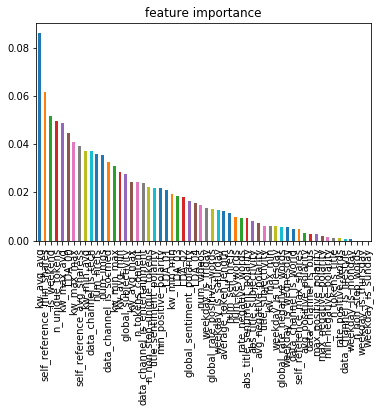

In [11]:
gbm=GradientBoostingClassifier()
kf=KFold(n_splits=5)
auc_mean,tpr,fpr=get_accuracy_clf(gbm,datac,target.sharesB,kf,dokf=True)
print("The ROC area under curve is : ",auc_mean)

## Random Forest Classifier

iteration :  1
iteration :  2
iteration :  3
iteration :  4
iteration :  5
CV Score : Mean - 0.6490133 | Std - 0.04325671 | Min - 0.5656774 | Max - 0.6827727
The ROC area under curve is :  0.617114563616


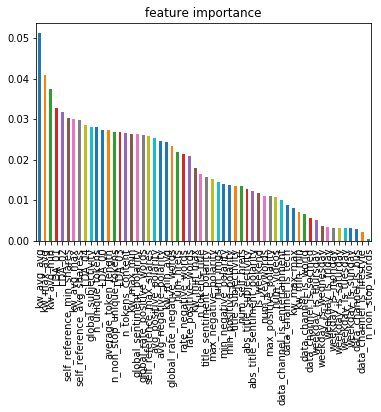

In [13]:
rfClf=RandomForestClassifier()
auc_mean2,tpr2,fpr2=get_accuracy_clf(rfClf,datac,target.sharesB,kf,dokf=True)
print("The ROC area under curve is : ",auc_mean2)

## Plotting the ROC curve

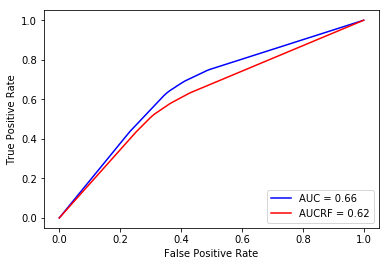

In [66]:
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % (auc_mean))
plt.plot(fpr2,tpr2,'r',label='AUCRF = %0.2f' % (auc_mean2))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Regression

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [88]:
def get_accuracy_reg(reg,data,target,kf):
#     print(data.index)
    score=[]
    score2=[]
    i=0
    targetl=np.log(1+target)
    for train_index,test_index in kf.split(data):
        print("iteration : ",i)
        xTrain,xTest=data.loc[train_index,:],data.loc[test_index,:]
        yTrain,yTest=targetl.loc[train_index],targetl.loc[test_index]
        yCheckTrain,yCheckTest=target.loc[train_index],target.loc[test_index]
#         print(xTest[xTest.isin([np.nan,-np.inf,np.inf]).any(1)])
#         print(xTrain[0])
#         print(yTrain[yTrain.isin([np.nan,-np.inf,np.inf])])
#         df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
        reg.fit(xTrain,yTrain)
        prediction=reg.predict(xTest)
#         print("prediction",prediction)
#         print(yTest)
        score.append(mean_absolute_percentage_error(yTest,prediction))
        score2.append(mean_absolute_percentage_error(yCheckTest,np.exp(prediction)))
        i+=1
        featImp=pd.Series(reg.feature_importances_,[x for x in xTrain.columns]).sort_values(ascending=False)
        featImp.plot(kind="bar",title="feature importance")
#     print("mean absolute percentage error is ",score)
    return score,score2
    

## Gradient Boost Regressor

iteration :  0
iteration :  1
iteration :  2
iteration :  3
iteration :  4
MAPE_LOG:  8.776427356021646
MAPE:  88.58837393273453


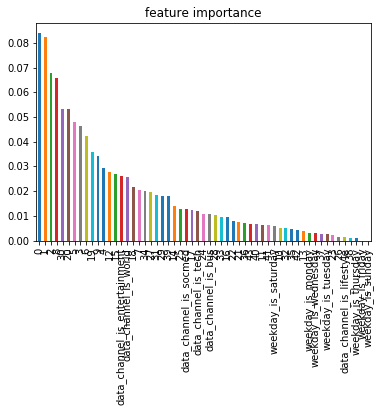

In [89]:
gbr=GradientBoostingRegressor()
regscore,regscore2=get_accuracy_reg(gbr,dataAfterPCA,target.shares,kf)
print("MAPE_LOG: ",sum(regscore)/len(regscore))
print("MAPE: ",sum(regscore2)/len(regscore2))

## Random Forest Regressor

In [44]:
rfr=RandomForestRegressor()
rfrRegScore,rfrRegScore2=get_accuracy_reg(rfr,dataAfterPCA,target.shares,kf)
print("MAPE_LOG: ",sum(rfrRegScore)/len(rfrRegScore))
print("MAPE: ",sum(rfrRegScore2)/len(rfrRegScore2))

iteration :  0
iteration :  1
iteration :  2
iteration :  3
iteration :  4
MAPE_LOG:  9.61910020982126
MAPE:  101.41666714017234
